In [1]:
import pandas as pd

In [2]:
ds_con=pd.read_csv("Concrete_Data.csv")
ds_con

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### Checking Null Values

In [3]:
ds_con.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

### Checking Data Types

In [4]:
ds_con.dtypes

Cement              float64
Blast               float64
Fly Ash             float64
Water               float64
Superplasticizer    float64
CA                  float64
FA                  float64
Age                   int64
CMS                 float64
dtype: object

### Bivariate Analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

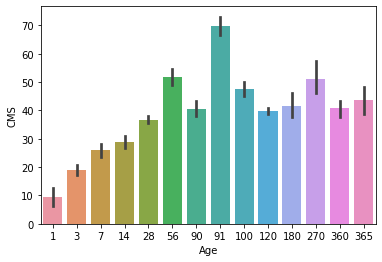

In [6]:
sns.barplot(x="Age",y="CMS",data=ds_con)
plt.show()

### Checking Correlation

In [7]:
ds_con.corr()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FA,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CMS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


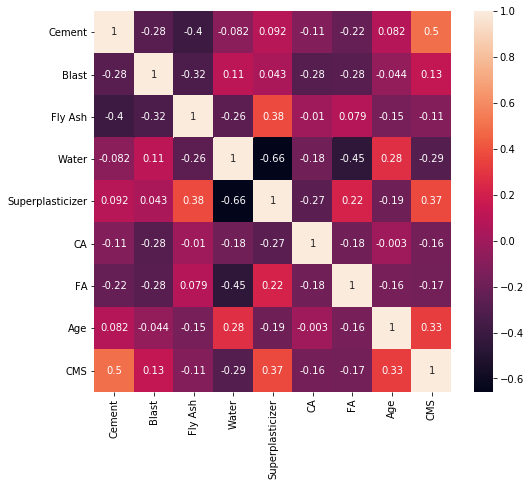

In [8]:
corr_hmap=ds_con.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

### Describing Statistics

In [9]:
ds_con.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Checking Skewness

In [10]:
ds_con.skew() #values higher than .55 will be considered as skewed data so we will do a log transform

Cement              0.509481
Blast               0.800717
Fly Ash             0.537354
Water               0.074628
Superplasticizer    0.907203
CA                 -0.040220
FA                 -0.253010
Age                 3.269177
CMS                 0.416977
dtype: float64

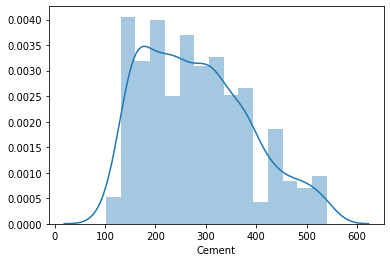

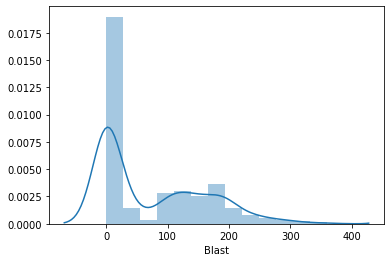

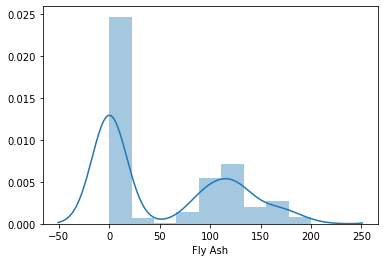

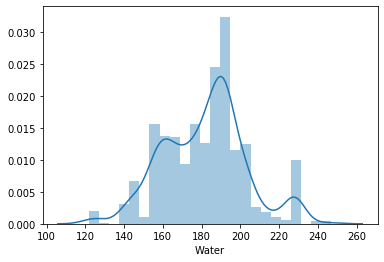

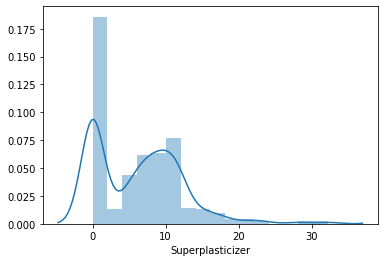

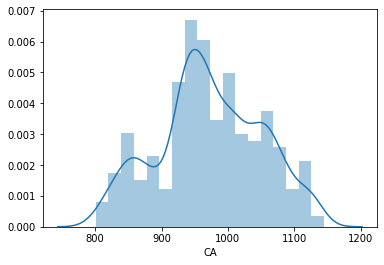

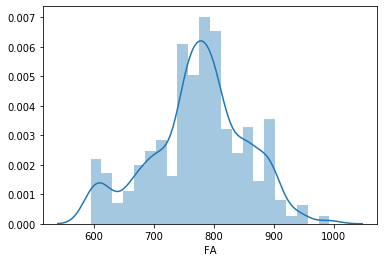

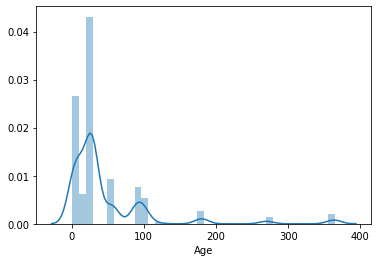

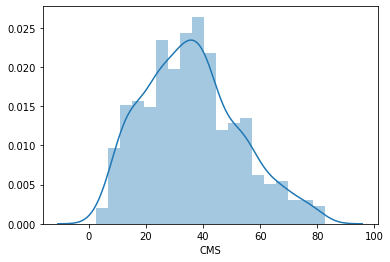

In [11]:
for i in ds_con.columns:
    plt.figure()
    sns.distplot(ds_con[i])

### Log Transformation

In [12]:
import numpy as np

In [13]:
for col in ds_con:                   #we have to use trial and error for log transformation. We can also use boxcox to transform
    if ds_con.skew().loc[col]>.55:
        ds_con[col]=np.log1p(ds_con[col])

In [14]:
ds_con.skew()

Cement              0.509481
Blast              -0.032700
Fly Ash             0.537354
Water               0.074628
Superplasticizer   -0.324821
CA                 -0.040220
FA                 -0.253010
Age                -0.005085
CMS                 0.416977
dtype: float64

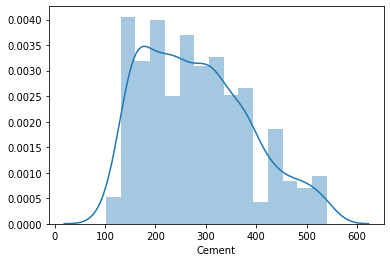

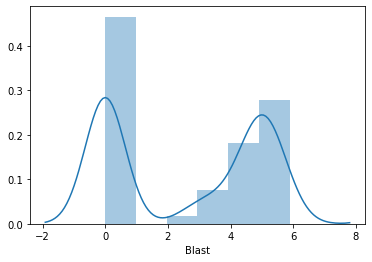

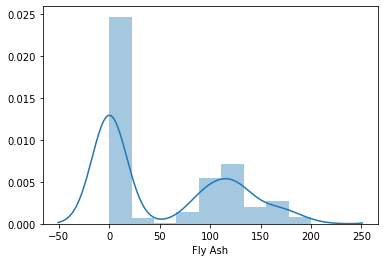

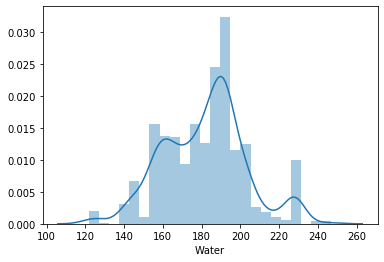

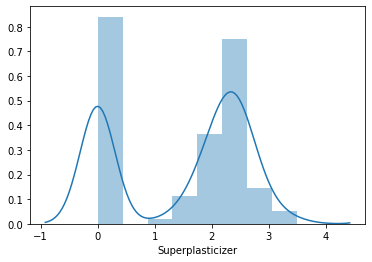

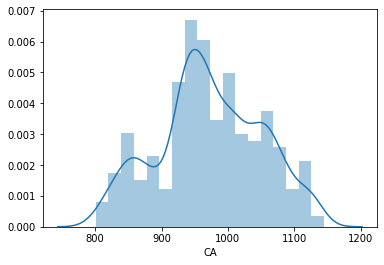

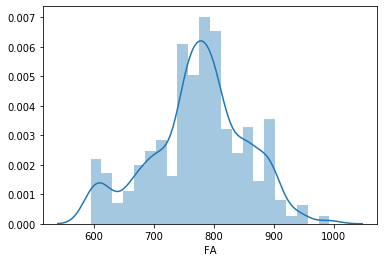

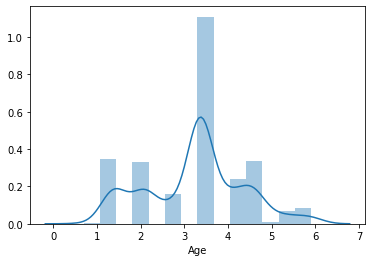

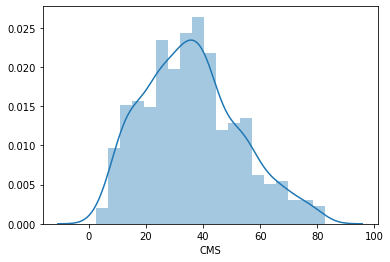

In [15]:
for i in ds_con.columns:       #rechecking the skweness
    plt.figure()
    sns.distplot(ds_con[i])

### Plotting Pairplot

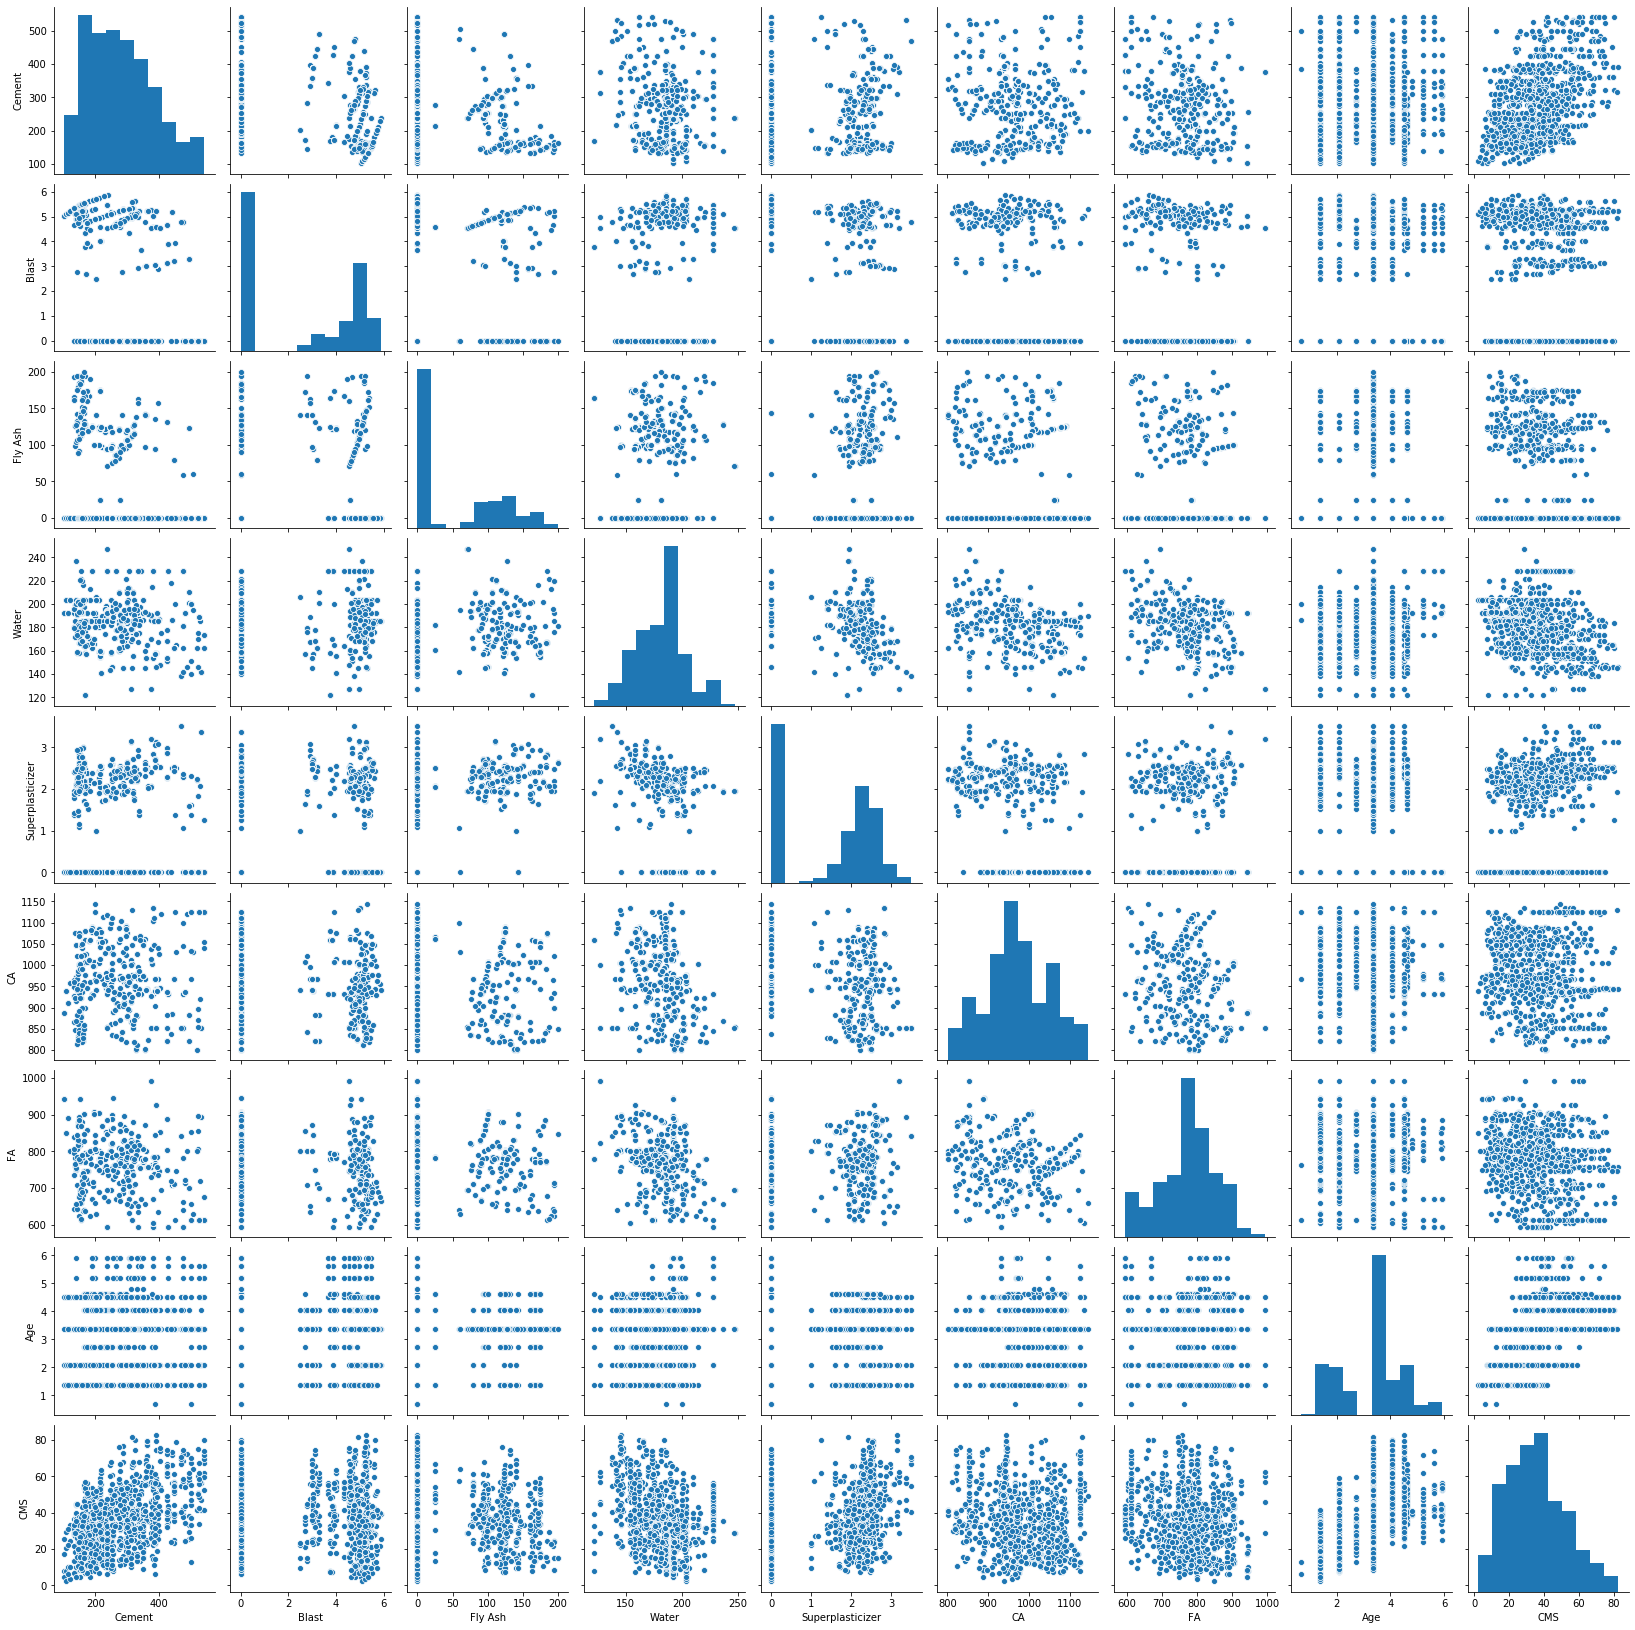

In [16]:
sns.pairplot(ds_con)

### Checking Outliers

In [17]:
from scipy.stats import zscore

In [18]:
z_score=abs(zscore(ds_con))
print(ds_con.shape)

(1030, 9)


In [19]:
ds_con_final=ds_con.loc[(z_score<3).all(axis=1)]
print(ds_con_final.shape)

(1028, 9)


### Seperating Input and Target Variable 

In [20]:
ds_x=ds_con_final.iloc[:,0:-1]
ds_x

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age
0,540.0,0.000000,0.0,162.0,1.252763,1040.0,676.0,3.367296
1,540.0,0.000000,0.0,162.0,1.252763,1055.0,676.0,3.367296
2,332.5,4.966335,0.0,228.0,0.000000,932.0,594.0,5.602119
3,332.5,4.966335,0.0,228.0,0.000000,932.0,594.0,5.902633
4,198.6,4.893352,0.0,192.0,0.000000,978.4,825.5,5.888878
...,...,...,...,...,...,...,...,...
1025,276.4,4.762174,90.3,179.6,2.292535,870.1,768.3,3.367296
1026,322.2,0.000000,115.6,196.0,2.433613,817.9,813.4,3.367296
1027,148.5,4.944495,108.6,192.7,1.960095,892.4,780.0,3.367296
1028,159.1,5.234845,0.0,175.6,2.509599,989.6,788.9,3.367296


In [21]:
y=ds_con_final.iloc[:,-1]
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: CMS, Length: 1028, dtype: float64

### Scaling Dataset

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc=StandardScaler()
x=sc.fit_transform(ds_x)

In [24]:
x=pd.DataFrame(ds_x,columns=ds_x.columns)
x

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age
0,540.0,0.000000,0.0,162.0,1.252763,1040.0,676.0,3.367296
1,540.0,0.000000,0.0,162.0,1.252763,1055.0,676.0,3.367296
2,332.5,4.966335,0.0,228.0,0.000000,932.0,594.0,5.602119
3,332.5,4.966335,0.0,228.0,0.000000,932.0,594.0,5.902633
4,198.6,4.893352,0.0,192.0,0.000000,978.4,825.5,5.888878
...,...,...,...,...,...,...,...,...
1025,276.4,4.762174,90.3,179.6,2.292535,870.1,768.3,3.367296
1026,322.2,0.000000,115.6,196.0,2.433613,817.9,813.4,3.367296
1027,148.5,4.944495,108.6,192.7,1.960095,892.4,780.0,3.367296
1028,159.1,5.234845,0.0,175.6,2.509599,989.6,788.9,3.367296


### Generating Best Random_State

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [26]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    re=LinearRegression()
    re.fit(x_train,y_train)
    y_pred=re.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random_state:",r_state,"is:",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr    
        final_r_state=r_state
print()
print()
print("max r2_score corresponding to",final_r_state,"is",max_r_score)

r2_score corresponding to random_state: 42 is: 0.8157334390718882
r2_score corresponding to random_state: 43 is: 0.7799561816555315
r2_score corresponding to random_state: 44 is: 0.795683540010681
r2_score corresponding to random_state: 45 is: 0.8045223943238069
r2_score corresponding to random_state: 46 is: 0.7925777179367487
r2_score corresponding to random_state: 47 is: 0.7932573063239553
r2_score corresponding to random_state: 48 is: 0.8226383192933098
r2_score corresponding to random_state: 49 is: 0.825789931516912
r2_score corresponding to random_state: 50 is: 0.7764407729817846
r2_score corresponding to random_state: 51 is: 0.8159465669616909
r2_score corresponding to random_state: 52 is: 0.7748366186178574
r2_score corresponding to random_state: 53 is: 0.81783945660672
r2_score corresponding to random_state: 54 is: 0.7979935791747604
r2_score corresponding to random_state: 55 is: 0.8168961478936353
r2_score corresponding to random_state: 56 is: 0.8308115498902517
r2_score corre

### Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
cross_val_score(LinearRegression(),x,y,cv=10,scoring="r2").mean()

0.661356739804939

### Re-Testing using Best Random_State

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.20)
re=LinearRegression()
re.fit(x_train,y_train)
y_pred=re.predict(x_test)
print("r2 score is :",r2_score(y_test,y_pred))
print("Root_Mean_Squared_Error is :",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is : 0.8308115498902517
Root_Mean_Squared_Error is : 7.061424236741105


### Saving the model

In [30]:
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [31]:
joblib.dump(re,"re_Concrete_Compressive.pkl")

['re_Concrete_Compressive.pkl']